# Import our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data Steven Rouk answer for error
# that occurred here.
%matplotlib inline
# col_names = ["year", "make", "model", "trim", "body", "transmission", "vin", "state", "condition",
#             "odometer", "color", "interior", "seller", "mmr", "sellingprice", "saledate"]
car_sales = pd.read_csv("resources/data/car_prices.csv", error_bad_lines=False, warn_bad_lines=False)

/Users/alexhewitt/Documents/c964_wgu_capstone/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alexhewitt/Documents/c964_wgu_capstone/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
car_sales.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# **Clean the data**

In [4]:
# Get datatypes of columns
car_sales.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

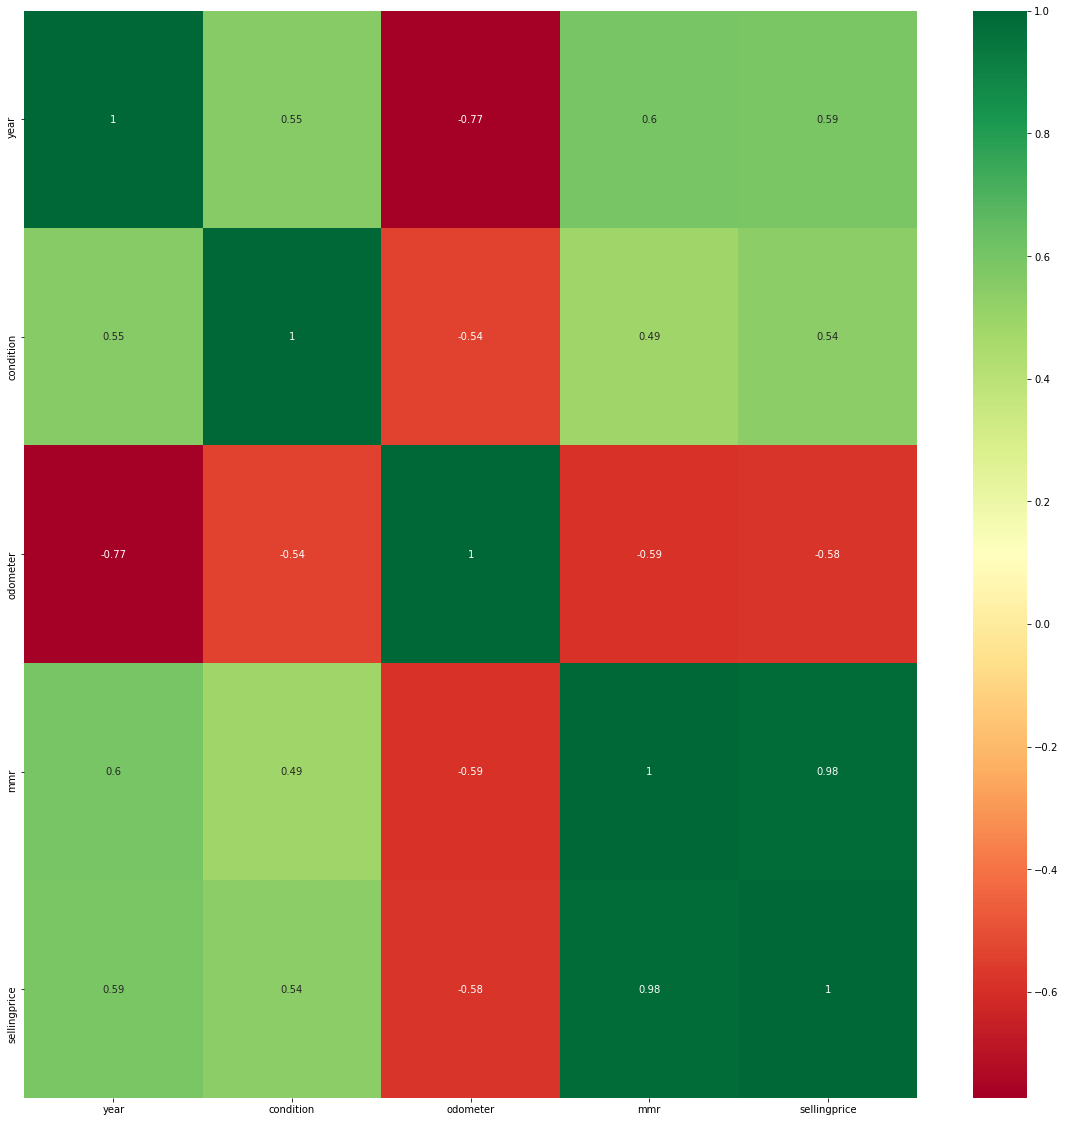

In [5]:
correlation = car_sales.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))

# plot heat map
graph = sns.heatmap(car_sales[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [6]:
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
# Drop data columns as to make modelling take less time, model may be less accurate though because of this
car_sales = car_sales.drop(['vin', 'mmr', 'saledate', 'seller', 'trim', 'state', 'condition',
                           'model', 'transmission', 'interior'], axis = 1)

In [8]:
# Drop Null rows, since this is a large data set it won't effect it too much.
print(car_sales.isna().sum())

year                0
make            10301
body            13195
odometer           94
color             749
sellingprice        0
dtype: int64


In [9]:
car_sales.count()

year            558811
make            548510
body            545616
odometer        558717
color           558062
sellingprice    558811
dtype: int64

In [10]:
car_sales = car_sales.dropna()

In [11]:
# Should all equal the same value
car_sales.count()

year            544810
make            544810
body            544810
odometer        544810
color           544810
sellingprice    544810
dtype: int64

In [12]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
dummies = pd.get_dummies(car_sales, drop_first = True)
dummies

,year,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,...,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,color_—
0,2015,16639.0,21500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,9393.0,21500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,1331.0,30000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,14282.0,27750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,2641.0,67000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,18255.0,33000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
558807,2012,54393.0,30800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
558808,2012,50561.0,34000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558809,2015,16658.0,11100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Create X (features matrix)
x = dummies.drop("sellingprice", axis = 1)

# Create y (labels)
y = dummies["sellingprice"]

# If running without a loaded model run the following code

In [14]:
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create model
reg_model = RandomForestRegressor()

# Split data (increase test_size to decrease model .pk1 file)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.95)

# Fit model
reg_model.fit(x_train, y_train);
#print(reg_model.feature_importances_)

# Make predictions
y_preds = reg_model.predict(x_test)
y_preds

# Score model
reg_model.score(x_test, y_test)

# Save a model
import pickle

pickle.dump(reg_model, open("random_forest_model_test1.pk1", "wb"))

In [15]:
reg_model.score(x_test, y_test)

0.7504937718113696

# If running from a loaded model run the following code 

In [ ]:
# # Modelling
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# import pickle

# # Open model
# reg_model = RandomForestRegressor()
# reg_model = pickle.load(open("random_forest_model.pk1", "rb"))

# # Split data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# # # Fit model
# # reg_model.fit(x_train, y_train);

# # Make predictions
# y_preds = reg_model.predict(x_test)
# y_preds

# # Score model
# reg_model.score(x_test, y_test)

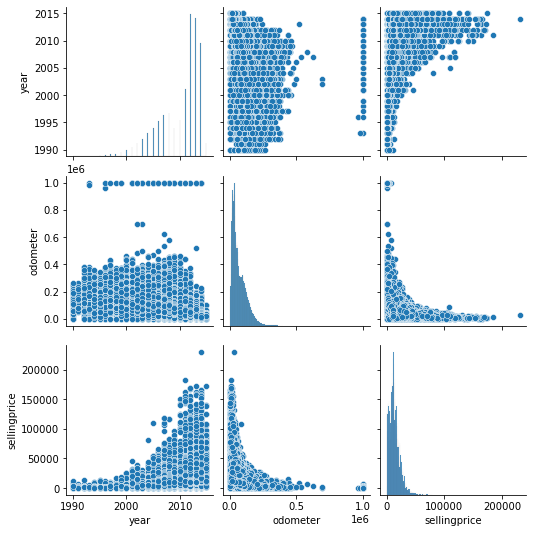

In [16]:
# Run this before importing seaborn if not already done !conda install -c anaconda seaborn -y
import seaborn as sns
sns.pairplot(car_sales)

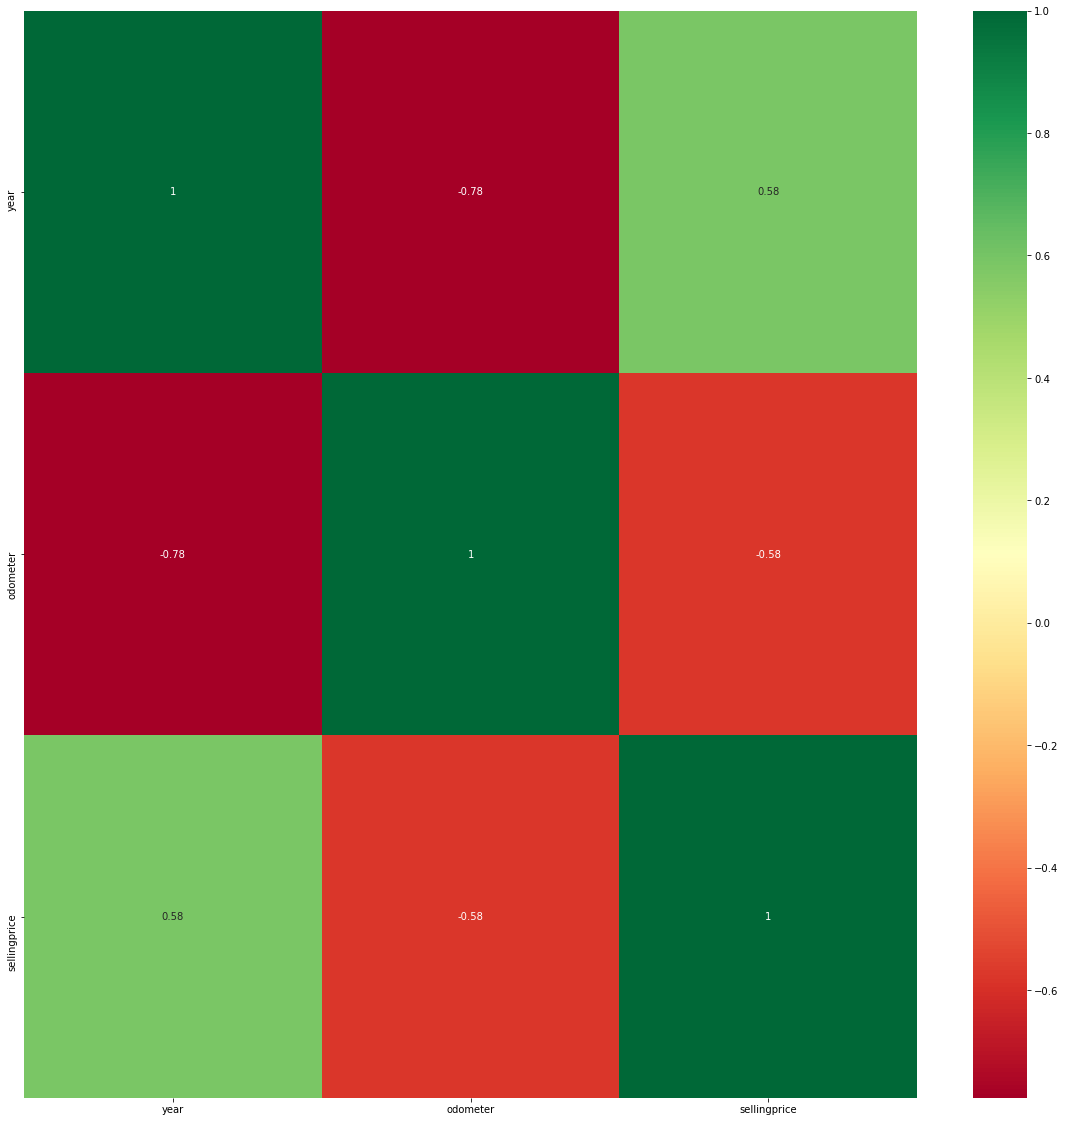

In [17]:
correlation = car_sales.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))

# plot heat map
graph = sns.heatmap(car_sales[top_corr_features].corr(), annot=True, cmap="RdYlGn")

/Users/alexhewitt/Documents/c964_wgu_capstone/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sellingprice'>

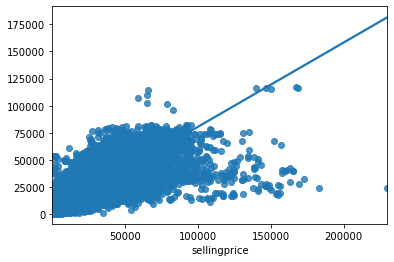

In [18]:
sns.regplot(y_test, y_preds)

In [19]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()  
# clf.fit(x_train,y_train)  

# weight = classifier.coef_